In [211]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer

In [212]:
df = pd.read_csv('./DataSets/Final DataSet.csv')

### Mapping

In [213]:
dataFrame = df

In [214]:

Labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'P', 'L']

mapping = {label:i for i, label in enumerate(Labels)}
dataFrame['reserved_room_type'] = df['reserved_room_type'].map(mapping)
dataFrame['reserved_room_type'].value_counts()


0    56189
3    17370
4     6012
5     2816
6     2041
1      999
2      914
7      596
9        6
8        1
Name: reserved_room_type, dtype: int64

In [215]:
Labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'P', 'L']

mapping = {label:i for i, label in enumerate(Labels)}
dataFrame['assigned_room_type'] = df['assigned_room_type'].map(mapping)
dataFrame['assigned_room_type'].value_counts()

0.0    46151
3.0    22278
4.0     7128
5.0     3608
6.0     2484
2.0     2144
1.0     1820
7.0      702
9.0        1
8.0        1
Name: assigned_room_type, dtype: int64

In [216]:
Labels = ['City Hotel', 'Resort Hotel']

mapping = {label:i for i, label in enumerate(Labels)}
dataFrame['hotel'] = df['hotel'].map(mapping)
dataFrame['hotel'].value_counts()

0    53422
1    33522
Name: hotel, dtype: int64

In [217]:
Labels = ['January', 'February','March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
mapping = {label:i for i, label in enumerate(Labels)}
dataFrame['arrival_date_month'] = df['arrival_date_month'].map(mapping)
dataFrame['arrival_date_month'].value_counts()

7     11236
6     10024
4      8343
3      7871
5      7753
2      7459
9      6883
8      6659
1      6043
11     5082
10     4953
0      4638
Name: arrival_date_month, dtype: int64

In [219]:
Labels = ['No Deposit', 'Non Refund','Refundable']
mapping = {label:i for i, label in enumerate(Labels)}
dataFrame['deposit_type'] = df['deposit_type'].map(mapping)
dataFrame['deposit_type'].value_counts()

0    85800
1     1037
2      107
Name: deposit_type, dtype: int64

In [220]:
Labels = ['Transient', 'Transient-Party','Contract', 'Group']
mapping = {label:i for i, label in enumerate(Labels)}
dataFrame['customer_type'] = df['customer_type'].map(mapping)
dataFrame['customer_type'].value_counts()

0    71573
1    11695
2     3139
3      537
Name: customer_type, dtype: int64

In [221]:
Labels = ['Check-Out', 'Canceled','No-Show']
mapping = {label:i for i, label in enumerate(Labels)}
dataFrame['reservation_status'] = df['reservation_status'].map(mapping)
dataFrame['reservation_status'].value_counts()

0    62953
1    22981
2     1010
Name: reservation_status, dtype: int64

### Correlation Matrix

C:\Users\ABC\AppData\Local\Temp\ipykernel_20236\4251772732.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Matrix = dataFrame.corr()


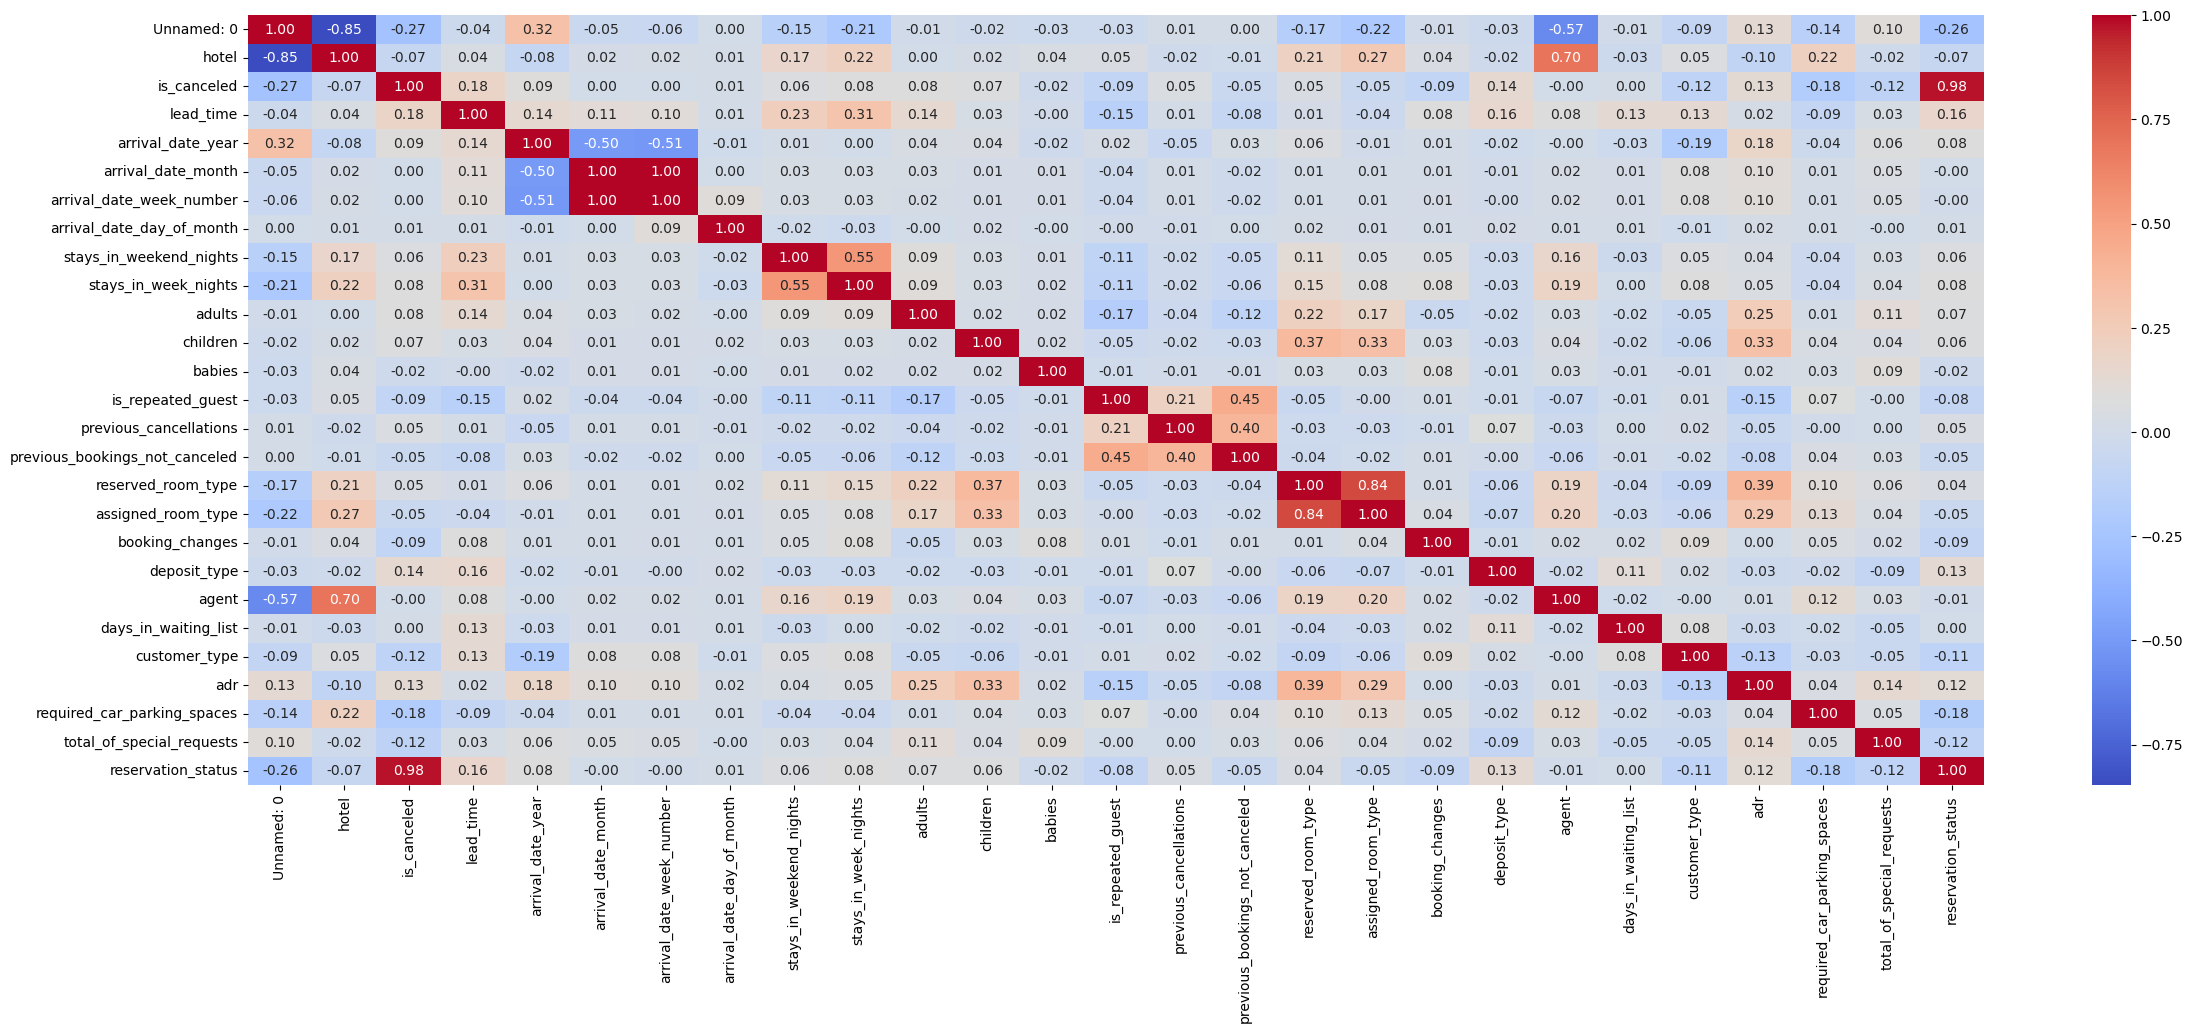

In [222]:
plt.figure(figsize=(28,10))
Matrix = dataFrame.corr()
sns.heatmap(Matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

### 1 Hot Encoding

In [223]:
dataFrame = pd.get_dummies(dataFrame, columns=['hotel', 'arrival_date_year', 'arrival_date_month', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status'])

dataFrame.drop('Unnamed: 0', axis=1, inplace=True)

### Min Max Scaling

In [224]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

numerical_features = ['lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'agent']

scaler_minmax = MinMaxScaler()
dataFrame[numerical_features] = scaler_minmax.fit_transform(dataFrame[numerical_features])

### TF/IDF on country Column

In [227]:
tfidf_vectorizer = TfidfVectorizer(max_features=5)

country_tfidf = tfidf_vectorizer.fit_transform(dataFrame['country'])

country_tfidf_df = pd.DataFrame(country_tfidf.toarray(), columns=[f'country_tfidf_{i}' for i in range(5)])


dataFrame = pd.concat([dataFrame, country_tfidf_df], axis=1)


In [228]:
dataFrame.shape

(86944, 75)

In [229]:
dataFrame.drop(['meal', 'country', 'distribution_channel', 'market_segment', 'reservation_status_date'], axis=1, inplace=True)

In [230]:
dataFrame.to_csv('./DataSets/DataSet_for_Models.csv')

### Feature Selection